In [1]:
!git clone https://github.com/Himank-J/ERAV2_Master.git

Cloning into 'ERAV2_Master'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 6.24 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
%cd ERAV2_Master

import sys
sys.path.append(".")

/content/ERAV2_Master


In [3]:
!ls

models	README.md  utility


In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from models.model_S10 import Net
from utility.utils_S10 import LoadDataset, VisualizeData, LearningRateFinder, TrainTest

In [7]:
dataloader = LoadDataset()
dataviz = VisualizeData()
lrf = LearningRateFinder()
traintest = TrainTest()

CUDA Available? True
MPS Available? False


In [8]:
train_loader,test_loader = dataloader.getData(512)

100%|██████████| 170498071/170498071 [00:02<00:00, 72455128.33it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train and Test data loaded


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


images.shape: torch.Size([512, 3, 32, 32])
labels.shape: torch.Size([512])
------


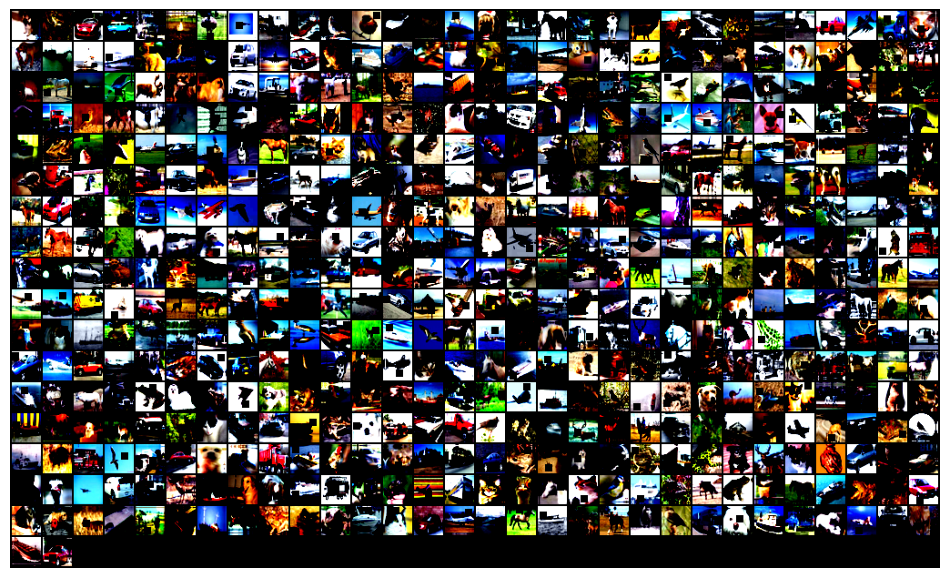

------


In [9]:
dataviz.visualize(train_loader)

In [10]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
    ResidualBlock-14          [-1, 128,

In [11]:
lrf.findLR(model,train_loader)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


  0%|          | 0/100 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 4.33E-04


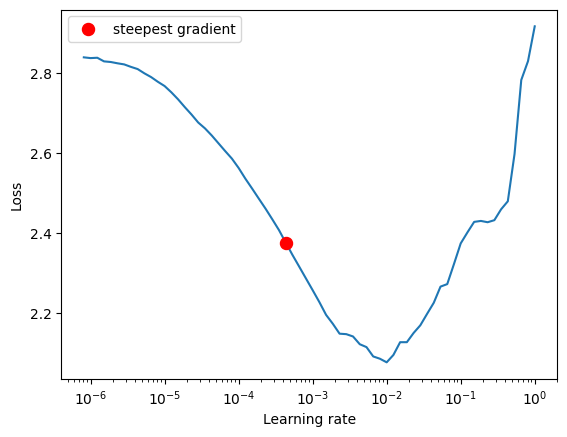

In [12]:
lrf.visualizeLR()

In [15]:
from torch.optim.lr_scheduler import OneCycleLR

model = Net().to(device)
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

scheduler = OneCycleLR(
    optimizer,
    max_lr=0.00043,
    total_steps=24,
    epochs=24
)

EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_losses = traintest.train(model, device, train_loader, optimizer, criterion)
    scheduler.step()
    test_acc, test_losses = traintest.test(model, device, test_loader, criterion)

EPOCH: 0


Train: Loss=1.6331 Batch_id=97 Accuracy=31.60: 100%|██████████| 98/98 [00:19<00:00,  5.12it/s]


Test set: Average loss: 0.0031, Accuracy: 4390/10000 (43.90%)

EPOCH: 1


Train: Loss=1.1903 Batch_id=97 Accuracy=50.06: 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]


Test set: Average loss: 0.0024, Accuracy: 5792/10000 (57.92%)

EPOCH: 2


Train: Loss=0.9923 Batch_id=97 Accuracy=60.21: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]


Test set: Average loss: 0.0019, Accuracy: 6588/10000 (65.88%)

EPOCH: 3


Train: Loss=0.8287 Batch_id=97 Accuracy=68.06: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]


Test set: Average loss: 0.0016, Accuracy: 7118/10000 (71.18%)

EPOCH: 4


Train: Loss=0.7533 Batch_id=97 Accuracy=73.57: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]


Test set: Average loss: 0.0014, Accuracy: 7592/10000 (75.92%)

EPOCH: 5


Train: Loss=0.5680 Batch_id=97 Accuracy=77.97: 100%|██████████| 98/98 [00:20<00:00,  4.79it/s]


Test set: Average loss: 0.0013, Accuracy: 7805/10000 (78.05%)

EPOCH: 6


Train: Loss=0.5138 Batch_id=97 Accuracy=81.08: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0012, Accuracy: 7950/10000 (79.50%)

EPOCH: 7


Train: Loss=0.3815 Batch_id=97 Accuracy=83.97: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]


Test set: Average loss: 0.0012, Accuracy: 8018/10000 (80.18%)

EPOCH: 8


Train: Loss=0.4049 Batch_id=97 Accuracy=86.13: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]


Test set: Average loss: 0.0010, Accuracy: 8306/10000 (83.06%)

EPOCH: 9


Train: Loss=0.3087 Batch_id=97 Accuracy=87.52: 100%|██████████| 98/98 [00:20<00:00,  4.77it/s]


Test set: Average loss: 0.0009, Accuracy: 8436/10000 (84.36%)

EPOCH: 10


Train: Loss=0.3533 Batch_id=97 Accuracy=89.22: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Test set: Average loss: 0.0008, Accuracy: 8597/10000 (85.97%)

EPOCH: 11


Train: Loss=0.2660 Batch_id=97 Accuracy=90.50: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0008, Accuracy: 8648/10000 (86.48%)

EPOCH: 12


Train: Loss=0.3012 Batch_id=97 Accuracy=91.76: 100%|██████████| 98/98 [00:20<00:00,  4.84it/s]


Test set: Average loss: 0.0009, Accuracy: 8539/10000 (85.39%)

EPOCH: 13


Train: Loss=0.2099 Batch_id=97 Accuracy=92.92: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0008, Accuracy: 8675/10000 (86.75%)

EPOCH: 14


Train: Loss=0.1926 Batch_id=97 Accuracy=94.13: 100%|██████████| 98/98 [00:20<00:00,  4.75it/s]


Test set: Average loss: 0.0007, Accuracy: 8832/10000 (88.32%)

EPOCH: 15


Train: Loss=0.1638 Batch_id=97 Accuracy=94.91: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0007, Accuracy: 8830/10000 (88.30%)

EPOCH: 16


Train: Loss=0.1319 Batch_id=97 Accuracy=95.58: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0007, Accuracy: 8862/10000 (88.62%)

EPOCH: 17


Train: Loss=0.0928 Batch_id=97 Accuracy=96.52: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0007, Accuracy: 8924/10000 (89.24%)

EPOCH: 18


Train: Loss=0.0853 Batch_id=97 Accuracy=97.04: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]


Test set: Average loss: 0.0006, Accuracy: 8996/10000 (89.96%)

EPOCH: 19


Train: Loss=0.0718 Batch_id=97 Accuracy=97.53: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]


Test set: Average loss: 0.0006, Accuracy: 9000/10000 (90.00%)

EPOCH: 20


Train: Loss=0.0676 Batch_id=97 Accuracy=97.77: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0006, Accuracy: 9018/10000 (90.18%)

EPOCH: 21


Train: Loss=0.0588 Batch_id=97 Accuracy=98.05: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0006, Accuracy: 9044/10000 (90.44%)

EPOCH: 22


Train: Loss=0.0810 Batch_id=97 Accuracy=98.23: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0006, Accuracy: 9049/10000 (90.49%)

EPOCH: 23


Train: Loss=0.0551 Batch_id=97 Accuracy=98.16: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0006, Accuracy: 9045/10000 (90.45%)



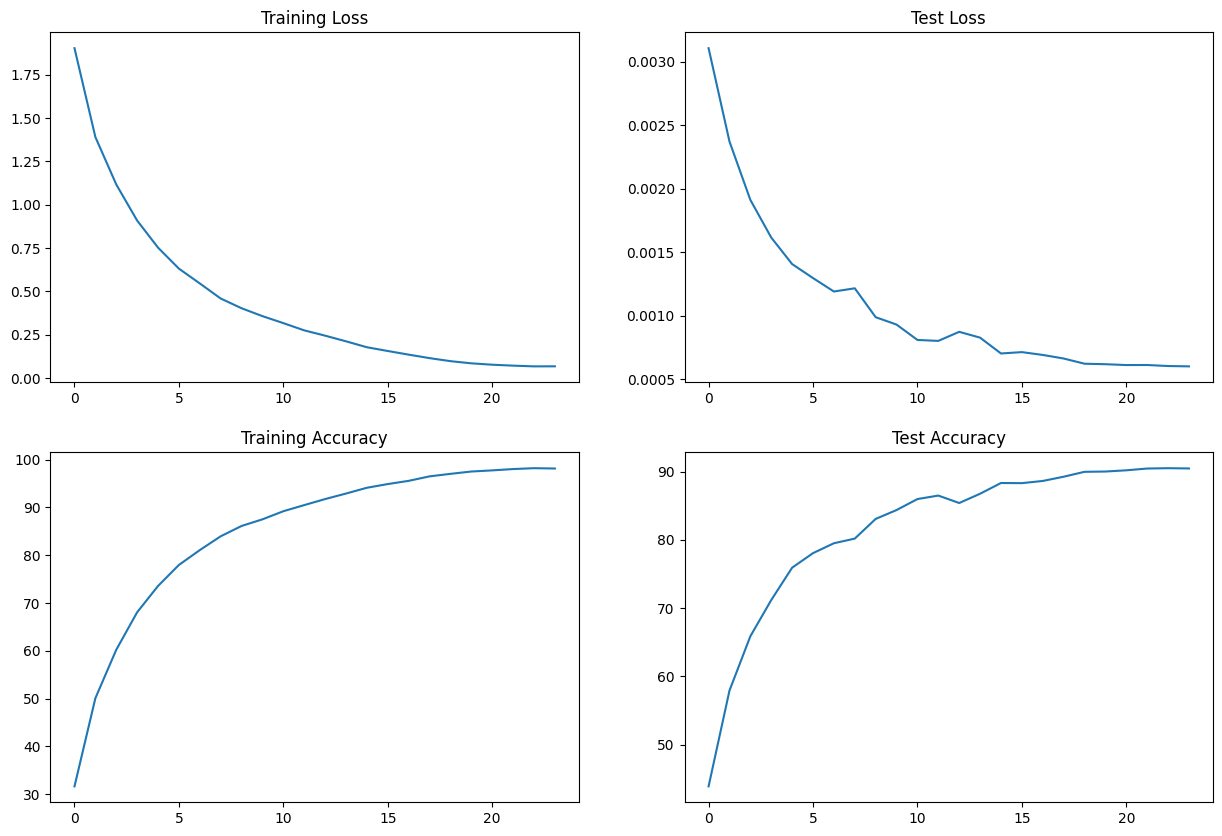

In [16]:
traintest.visualizeLoss(train_losses,train_acc,test_losses,test_acc)